<a href="https://colab.research.google.com/github/Zia-Ur-Rehman1/Machine-Learning/blob/master/Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/ML/Data.zip"


In [21]:
import numpy as np
import pickle
import weakref
import cv2
import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
EPOCHS =10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((100, 100))
directory_root = '/content/Data'
width=100
height=100
depth=3


In [23]:
image_list, label_list = [], []
img_size=100
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
      fp = os.path.join(directory_root,directory)
      for eachImage in os.listdir(fp):
        imagePath = os.path.join(fp,eachImage)
        img = cv2.imread(imagePath)
        resized = cv2.resize(img , (img_size , img_size))
        image_list.append(resized)
        label_list.append(directory)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Image loading completed


# New section

In [24]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [25]:
np_image_list = np.array(image_list) / 255.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [7]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [8]:
# model = Sequential()
# inputShape = (height, width, depth)
# chanDim = -1
# if K.image_data_format() == "channels_first":
#     inputShape = (height, width, depth)
#     chanDim = 1
# model.add(Conv2D(40, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(200))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("sigmoid"))
# model.summary()

In [31]:
model = Sequential()

model.add(Conv2D(80, (3, 3), input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(160, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(160, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(50))
model.add(Activation('relu'))
 
model.add(Dense(2))
model.add(Activation('softmax'))

In [32]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [33]:
history = model.fit(
    np_image_list,image_labels,32,10,1,
    validation_data=(x_test, y_test),
    )


Epoch 1/10
78/78 [==============================] - 5s 47ms/step - loss: 0.6653 - accuracy: 0.6551 - val_loss: 0.3936 - val_accuracy: 0.8727
Epoch 2/10
78/78 [==============================] - 3s 35ms/step - loss: 0.2966 - accuracy: 0.8796 - val_loss: 0.2455 - val_accuracy: 0.9515
Epoch 3/10
78/78 [==============================] - 3s 34ms/step - loss: 0.2233 - accuracy: 0.9205 - val_loss: 0.0936 - val_accuracy: 0.9657
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 0.1923 - accuracy: 0.9380 - val_loss: 0.1259 - val_accuracy: 0.9677
Epoch 5/10
78/78 [==============================] - 3s 35ms/step - loss: 0.1437 - accuracy: 0.9565 - val_loss: 0.0597 - val_accuracy: 0.9778
Epoch 6/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0868 - accuracy: 0.9709 - val_loss: 0.0882 - val_accuracy: 0.9919
Epoch 7/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0789 - accuracy: 0.9722 - val_loss: 0.0380 - val_accuracy: 0.9919
Epoch 8/10
78

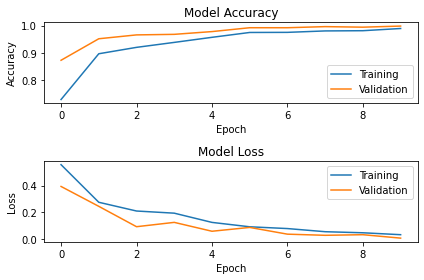

In [34]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [35]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
16/16 [==============================] - 0s 12ms/step - loss: 0.0085 - accuracy: 0.9980
Test Accuracy: 99.79798197746277


In [36]:
# save the model to disk
print("[INFO] Saving model...")
model.save('/content/drive/MyDrive/ML/CNN_MODEL_Plant.h5')

[INFO] Saving model...
